Datos

Nombre del conjunto de datos: Marketing Bancario (Bank Marketing Dataset - UCI)

Fuente original: Repositorio UCI de aprendizaje automático

Número de ejemplos (m): 41.188 registros

Número de propiedades (n): 20 características (más la variable objetivo y)

Tipo de problema: Clasificación binaria (regresión logística)

Variable objetivo:

y → indica si el cliente aceptó suscribirse a un depósito a plazo (yes) o no lo hizo (no).

Descripción de las variables del conjunto de datos
Columna	Tipo de dato	Descripción
age	Numérica	Edad del cliente.  
Job	Categórica	Tipo de trabajo (administrativo, técnico, obrero, servicios, etc.).  
Marital	Categórica	Estado civil (casado, soltero, divorciado).
education	Categórica	Nivel educativo (primaria, secundaria, terciaria, desconocido).  
Default	Categórica	Indica si el cliente tiene crédito en mora (yes, no, unknown).    
Balance	Numérica	Saldo promedio anual en la cuenta bancaria (en euros).
housing	Categórica	Indica si el cliente tiene préstamo de vivienda (yes, no, unknown).  
Loan	Categórica	Indica si el cliente tiene otro tipo de préstamo personal (yes, no, unknown).  
Contact	Categórica	Tipo de contacto utilizado para la campaña (celular o teléfono).  
Day	Numérica	Día del mes en que se realizó el último contacto con el cliente.  
Month	Categórica	Mes en que se realizó el último contacto (ene, feb, mar, …, dic).  
Duration	Numérica	Duración del último contacto telefónico (en segundos).  
Campaign	Numérica	Número de contactos realizados durante esta campaña.
pdays	Numérica	Días transcurridos desde el último contacto previo (-1 significa “nunca contactado”).  
Previous	Numérica	Número de contactos realizados antes de esta campaña.  
Poutcome	Categórica	Resultado de la campaña de marketing anterior (éxito, fracaso, otro, desconocido).  
Emp.var.rate	Numérica	Tasa de variación del empleo (indicador económico).  
Cons.price.idx	Numérica	Índice de precios al consumidor.  
Cons.conf.idx	Numérica	Índice de confianza del consumidor.  
Euribor3m	Numérica	Tasa Euribor a 3 meses.  
Nr.employed	Numérica	Número de empleados (indicador económico).  
Categórica (objetivo)	Indica si el cliente se suscribió a un depósito a plazo (yes = 1, no = 0).

 1. Librerías necesarias


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

2. Cargar el dataset


In [2]:
df = pd.read_csv('/content/drive/MyDrive/MarketingB.csv', sep=';')

In [3]:
print(df.head())
print(df.info())
print(df['y'].value_counts())  # Ver la distribución de la variable objetivo


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

 3. Preprocesamiento de datos


In [4]:
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous',
                      'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                        'contact', 'month', 'day_of_week', 'poutcome']

In [5]:

df[categorical_features] = df[categorical_features].astype(str)

In [6]:
X = df.drop('y', axis=1)
y = df['y'].map({'no':0, 'yes':1})  # Convertir la variable objetivo a binaria

4. Dividir en entrenamiento y prueba

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. Crear pipeline seguro

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

 6. Entrenar el modelo

In [9]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [10]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]  # Probabilidad de clase positiva

In [11]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Precisión del modelo: {accuracy:.4f}')
print('Matriz de confusión:')
print(conf_matrix)

Precisión del modelo: 0.9111
Matriz de confusión:
[[7105  198]
 [ 534  401]]


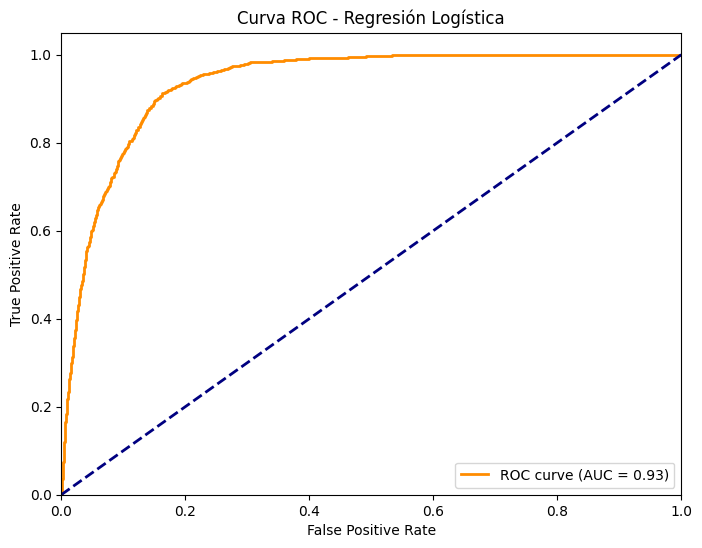

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc='lower right')
plt.show()